https://www.kaggle.com/code/irudunoghenaosiseh/nlp-with-tweet-disaster

In [5]:
# Import necessary libraries 
import pandas as pd  # For handling data in DataFrame format

#Natural language processing libraries
import nltk  # For natural language processing tasks(i.e A library for working with human language data)
from nltk.corpus import stopwords  # To access stopwords for text preprocessing
from nltk.stem import WordNetLemmatizer # To reduce words to their base or root form
from nltk.tokenize import word_tokenize

In [6]:
import re

In [7]:
import os
import pandas as pd

os.chdir('E:\Python code\IBM 文本分类数据')

file_name = 'IMDB Dataset.csv'
df = pd.read_csv(file_name)
df.head() 

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [8]:
#数据处理

def preprocess_text(text):
    text = re.sub(r'<[^>]+>', '', text)
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    processed_text = ' '.join(tokens)
    return processed_text
df['processed_review'] = df['review'].apply(preprocess_text)
df.drop('review', axis=1, inplace=True)
labels = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0).values

In [9]:
df['target'] = labels
df = df.rename({'processed_review':'text'},axis=1)
df.drop(['sentiment'],axis =1,inplace=True)

In [10]:
df.head()

,text,target
0,one reviewers mentioned watching 1 oz episode ...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically theres family little boy jake thinks...,0
4,petter matteis love time money visually stunni...,1


In [11]:
# Check for missing values
df.isnull().sum()

text      0
target    0
dtype: int64

In [12]:
#Check for duplicate record
df.duplicated().sum()

422

In [13]:
df.shape

(50000, 2)

In [15]:
train_data = df[:10000]
test_data  = df[40000::]

In [16]:
# Check the overall structure and info about the dataset
train_data.info()  # To get information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10000 non-null  object
 1   target  10000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


In [18]:
# Import the required library for visualization
import seaborn as sns
import matplotlib.pyplot as plt

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


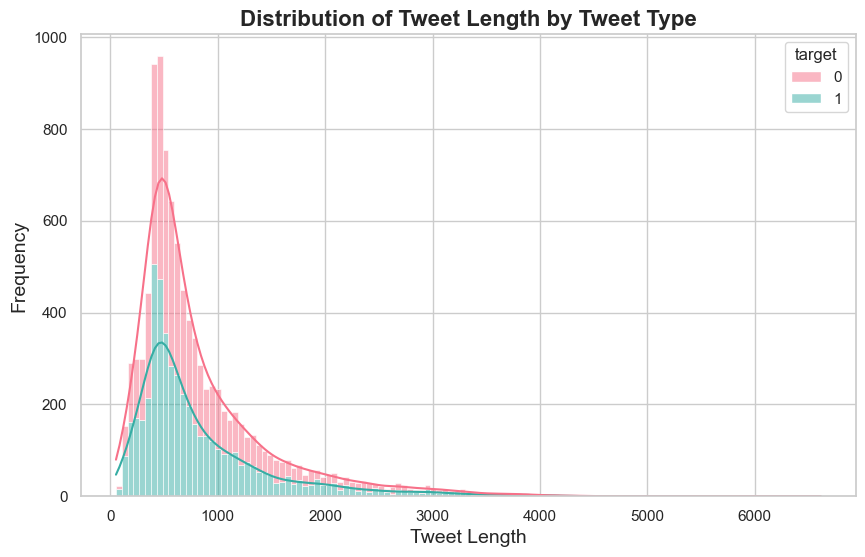

In [19]:
# Copy the dataframe to avoid changing the original one
train_data_copy = train_data.copy()

# Calculate the length of each tweets
train_data_copy['Tweet_length'] = train_data_copy['text'].str.len()

# Set plot style
sns.set(style='whitegrid')

# Create a figure and plot the distribution of tweet lengths
plt.figure(figsize=(10, 6))

# Plot the distribution of tweet lengths for 0 and 1
sns.histplot(data=train_data_copy, x='Tweet_length', hue='target', multiple='stack', palette='husl', kde=True)

# Customize the title and label
plt.xlabel('Tweet Length', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Tweet Length by Tweet Type', fontsize=16, fontweight='bold')

# Show the plot
plt.show()


5.4 Word Clouds

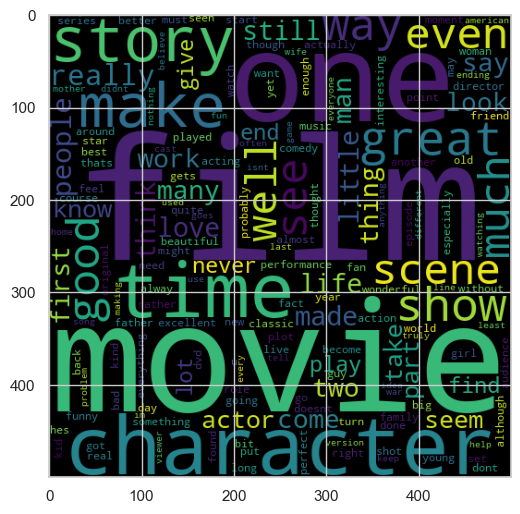

In [20]:
#Create a word cloud for Disaster Tweets

#import wordcloud library
from wordcloud import WordCloud

wordcloud = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'black')
spam_wordcloud = wordcloud.generate(train_data[train_data['target'] == 1]['text'].str.cat(sep = " "))
plt.figure(figsize = (14,6))
plt.imshow(spam_wordcloud)
plt.show()

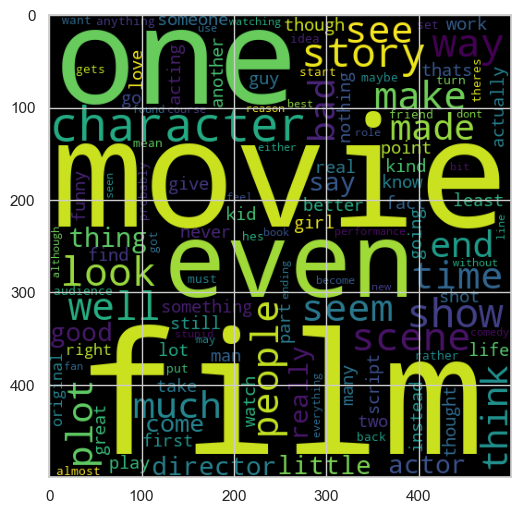

In [35]:
#Create a word cloud for Non-disaster tweets

wordcloud = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'black')
ham_wordcloud = wordcloud.generate(train_data[train_data['target'] == 0]['text'].str.cat(sep = " "))
plt.figure(figsize = (14,6))
plt.imshow(ham_wordcloud)
plt.show()

6. Model Building and Training

In [21]:
from sklearn.model_selection import train_test_split  # To split data into training and testing sets
#Train-test split
X = train_data['text']
y = train_data['target']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=3000)

# Transform the training and testing data
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import PassiveAggressiveClassifier

In [24]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Neural Network': MLPClassifier(),
    'Extra Trees Classifier': ExtraTreesClassifier(),
    'Passive Aggressive Classifier': PassiveAggressiveClassifier()
    

}

In [25]:
# Train each model and store the predictions
predictions = {}
for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    predictions[name] = model.predict(X_val_tfidf)


In [26]:
# Make predictions for each model
predictions = {}
for name, model in models.items():
    predictions[name] = model.predict(X_val_tfidf)

7. Model Evaluation

In [27]:
# Evaluate each model by displaying f1 score
from sklearn.metrics import f1_score

# Collect accuracy scores and classification reports
results = {}
for name, y_pred in predictions.items():
    f1 = f1_score(y_val, y_pred)
    
    results[name] = {
        'f1_score': f1
    }


# Display results
for name, result in results.items():
    print(f"Model: {name}")
    print(f"f1_score: {result['f1_score']:.4f}")
    print(' ')

Model: Logistic Regression
f1_score: 0.8644
 
Model: Naive Bayes
f1_score: 0.8394
 
Model: Random Forest
f1_score: 0.8416
 
Model: Support Vector Machine
f1_score: 0.8765
 
Model: Gradient Boosting
f1_score: 0.8051
 
Model: K-Nearest Neighbors
f1_score: 0.7085
 
Model: Decision Tree
f1_score: 0.6923
 
Model: Neural Network
f1_score: 0.8180
 
Model: Extra Trees Classifier
f1_score: 0.8479
 
Model: Passive Aggressive Classifier
f1_score: 0.8100
 


8. Train with the best Model

In [28]:
#Train the best model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

9. Submission

In [29]:
#Prepare submission
test_data['text'] = test_data['text'].apply(preprocess_text)
test_vec = tfidf.transform(test_data['text'])
test_pred = model.predict(test_vec)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_28308\1643821407.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['text'] = test_data['text'].apply(preprocess_text)


In [30]:
#submission file
#submission = pd.DataFrame({'id': test_data['id'], 'target': test_pred})
#submission.to_csv('submission.csv', index=False)

KeyError: 'id'